In [212]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.24.2
matplotlib version: 3.0.3
NumPy version: 1.16.2
SciPy version: 1.2.1
IPython version: 7.4.0
scikit-learn version: 0.20.3
-------------------------


In [213]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [214]:
data_raw = pd.read_csv('train.csv')

In [215]:
data_val = pd.read_csv('test.csv')

In [216]:
df = data_raw.copy()

In [217]:
datasets = [df,data_val]

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [219]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
288,289,1,2,"Hosono, Mr. Masabumi",male,42.00,0,0,237798,13.0000,NaN,S
511,512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.00,0,0,36963,32.3208,D50,S
501,502,0,3,"Canavan, Miss. Mary",female,21.00,0,0,364846,7.7500,NaN,Q
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.00,1,1,248738,29.0000,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
834,835,0,3,"Allum, Mr. Owen George",male,18.00,0,0,2223,8.3000,NaN,S
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.00,0,0,349203,7.8958,NaN,S
762,763,1,3,"Barah, Mr. Hanna Assi",male,20.00,0,0,2663,7.2292,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


<a id="ch5"></a>
## 3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting
In this stage, we will clean our data by 1) correcting aberrant values and outliers, 2) completing missing information, 3) creating new features for analysis, and 4) converting fields to the correct format for calculations and presentation.

1. **Correcting:** Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs. In addition, we see we may have potential outliers in age and fare. However, since they are reasonable values, we will wait until after we complete our exploratory analysis to determine if we should include or exclude from the dataset. It should be noted, that if they were unreasonable values, for example age = 800 instead of 80, then it's probably a safe decision to fix now. However, we want to use caution when we modify data from its original value, because it may be necessary to create an accurate model.
2. **Completing:** There are null values or missing data in the age, cabin, and embarked field. Missing values can be bad, because some algorithms don't know how-to handle null values and will fail. While others, like decision trees, can handle null values. Thus, it's important to fix before we start modeling, because we will compare and contrast several models. There are two common methods, either delete the record or populate the missing value using a reasonable input. It is not recommended to delete the record, especially a large percentage of records, unless it truly represents an incomplete record. Instead, it's best to impute missing values. A basic methodology for qualitative data is impute using mode. A basic methodology for quantitative data is impute using mean, median, or mean + randomized standard deviation. An intermediate methodology is to use the basic methodology based on specific criteria; like the average age by class or embark port by fare and SES. There are more complex methodologies, however before deploying, it should be compared to the base model to determine if complexity truly adds value. For this dataset, age will be imputed with the median, the cabin attribute will be dropped, and embark will be imputed with mode. Subsequent model iterations may modify this decision to determine if it improves the model’s accuracy.
3. **Creating:**  Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome. For this dataset, we will create a title feature to determine if it played a role in survival.
4. **Converting:** Last, but certainly not least, we'll deal with formatting. There are no date or currency formats, but datatype formats. Our categorical data imported as objects, which makes it difficult for mathematical calculations. For this dataset, we will convert object datatypes to categorical dummy variables.

### Correcting


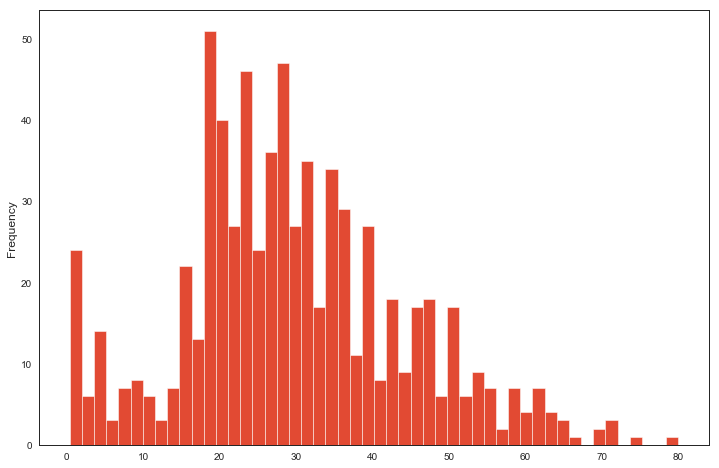

In [220]:
df.Age.plot.hist(bins=50)

In [221]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


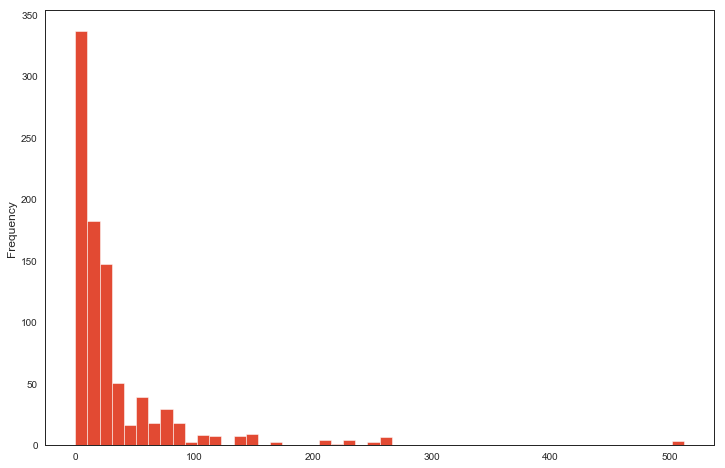

In [222]:
df.Fare.plot.hist(bins=50)

In [223]:
np.percentile(df.Fare,99)

249.00622000000033

## Completing

In [224]:
print(df.isnull().any())
print(data_val.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [225]:
for dataset in datasets:
    dataset.Age = dataset.Age.fillna(dataset.Age.median())
    dataset["Embarked"] = dataset.groupby("Pclass")['Embarked'].transform(lambda x: x.fillna(x.mode()[0]))
    dataset["Fare"] = dataset.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.mean()))

In [226]:
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
df.drop(drop_column, axis=1, inplace = True)

In [227]:
print(df.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [228]:
for dataset in datasets:
    dataset['FamilySize'] = dataset.SibSp + dataset.Parch +1
    dataset['IsAlone'] = 1
    dataset['IsAlone'][dataset.FamilySize > 1] = 0
    dataset['Title'] = dataset['Name'].str.split(r', ',expand=True)[1].str.split(r'.',expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'],4)
    dataset['AgeBin'] = pd.cut(dataset['Age'],5)

In [229]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.252, 48.168]"


In [230]:
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (df['Title'].value_counts() < stat_min) #this will create a true false series with title name as index
df['Title'] = df['Title'].apply(lambda x: 'Misc' if title_names.loc[x]==True else x)

In [231]:
df.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
507,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,28.0,0,0,26.5500,S,1,1,Mr,"(14.454, 31.0]","(16.336, 32.252]"
371,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,6.4958,S,2,0,Mr,"(-0.001, 7.91]","(16.336, 32.252]"
339,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,35.5000,S,1,1,Mr,"(31.0, 512.329]","(32.252, 48.168]"
459,0,3,"O'Connor, Mr. Maurice",male,28.0,0,0,7.7500,Q,1,1,Mr,"(-0.001, 7.91]","(16.336, 32.252]"
32,1,3,"Glynn, Miss. Mary Agatha",female,28.0,0,0,7.7500,Q,1,1,Miss,"(-0.001, 7.91]","(16.336, 32.252]"
654,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,6.7500,Q,1,1,Miss,"(-0.001, 7.91]","(16.336, 32.252]"
277,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,0.0000,S,1,1,Mr,"(-0.001, 7.91]","(16.336, 32.252]"
566,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.336, 32.252]"
881,0,3,"Markun, Mr. Johann",male,33.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(32.252, 48.168]"
426,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,26.0000,S,2,0,Mrs,"(14.454, 31.0]","(16.336, 32.252]"


In [232]:
to_be_encoded = ['Sex','Embarked','Title','FareBin','AgeBin']
label = LabelEncoder()
for dataset in datasets:
    for column in to_be_encoded:
        dataset[column+'_Code'] = label.fit_transform(dataset[column])

In [233]:
#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
df_x_charts = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
df_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
df_xy_charts =  Target + df_x_charts
print('Original X Y: ', df_xy_charts, '\n')

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 



In [234]:
#define x variables for original w/bin features to remove continuous variables
df_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
df_xy_bin = Target + df_x_bin
print('Bin X Y: ', df_xy_bin, '\n')

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 



In [235]:
#define x and y variables for dummy features original
df_charts_dummy = pd.get_dummies(df[df_x_charts])
df_charts_dummy_columns = df_charts_dummy.columns.tolist()
df_xy_charts_dummy_columns = Target + df_charts_dummy_columns
print('Dummy X Y: ', df_xy_charts_dummy_columns, '\n')



df_charts_dummy.head()


Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [236]:
print('Train columns with null values: \n', df.isnull().sum())
print("-"*10)
print (df.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
FareBin_Code     0
AgeBin_Code      0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null catego

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jussila, Miss. Mari Aina",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [237]:
df_x_charts

['Sex',
 'Pclass',
 'Embarked',
 'Title',
 'SibSp',
 'Parch',
 'Age',
 'Fare',
 'FamilySize',
 'IsAlone']

In [238]:
for feature in df_x_charts:
    print(f'Survival correlation by {feature}')
    print(df[[feature,Target[0]]].groupby(feature,as_index=False).mean())
    print('-'*50)

Survival correlation by Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
--------------------------------------------------
Survival correlation by Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
--------------------------------------------------
Survival correlation by Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
--------------------------------------------------
Survival correlation by Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
--------------------------------------------------
Survival correlation by SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
--------------------------------------------------
Survival correlation by Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  

In [239]:
df[['Title',Target[0]]].groupby(['Title',Target[0]],as_index=False).size().unstack()

Survived,0,1
Title,,
Master,17,23
Misc,15,12
Miss,55,127
Mr,436,81
Mrs,26,99


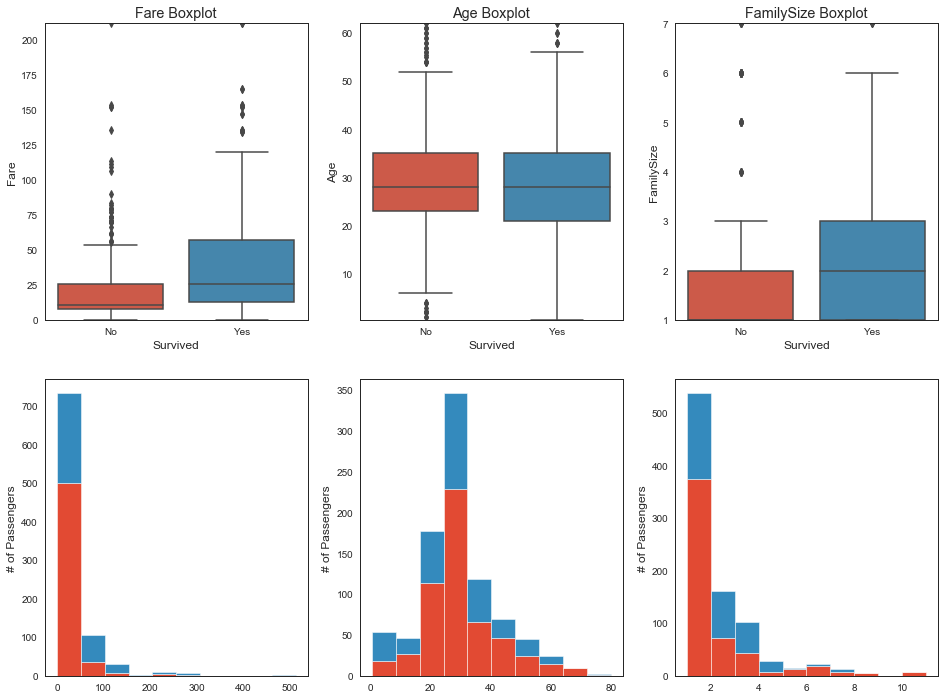

In [240]:
plt.figure(figsize=[16,12])
for i,feature in enumerate(['Fare','Age','FamilySize']):    
    axes = plt.subplot(231+i)    
    sns.boxplot(x=df['Survived'],y=df[feature],)
    plt.title(f'{feature} Boxplot')
    plt.ylabel(feature)
    #{0:'No',1:'Yes'}
    axes.set_xticklabels(['No','Yes'])
    #plt.xticks([['No','Yes']])
    plt.ylim([np.percentile(df[feature], 0),np.percentile(df[feature], 98)])
    
    plt.subplot(234+i)
    plt.hist(x=[df[df['Survived']==0][feature],df[df['Survived']==1][feature]],stacked=True)
    #plt.xlabel()
    plt.ylabel('# of Passengers')

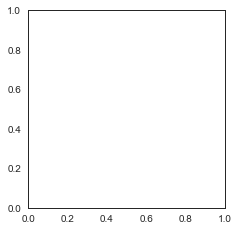

In [241]:
axes = plt.subplot(231+i)   

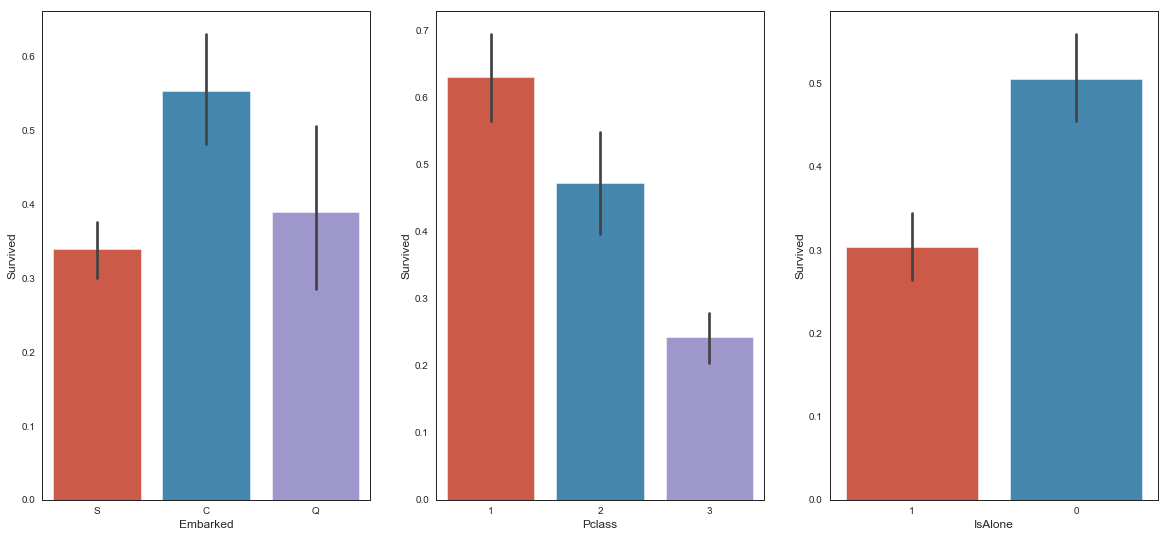

In [242]:
plt.figure(figsize=(20,9))
plt.subplot(131)    
sns.barplot(x = 'Embarked', y = 'Survived', data=df)
plt.subplot(132)    
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=df)
plt.subplot(133)    
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=df)

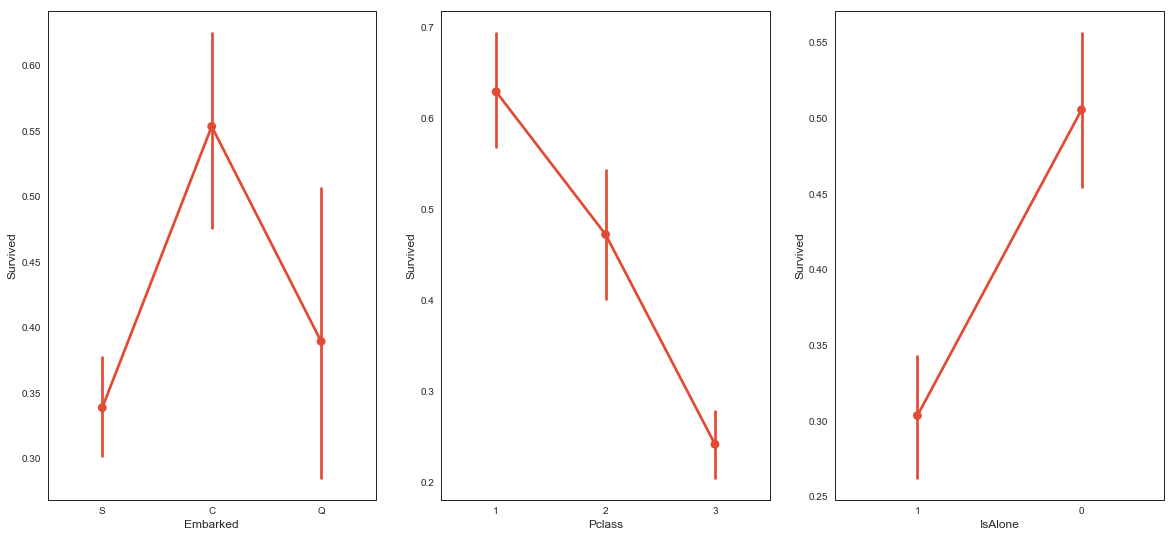

In [243]:
plt.figure(figsize=(20,9))
plt.subplot(131)    
sns.pointplot(x = 'Embarked', y = 'Survived', data=df)
plt.subplot(132)    
sns.pointplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=df)
plt.subplot(133)    
sns.pointplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=df)

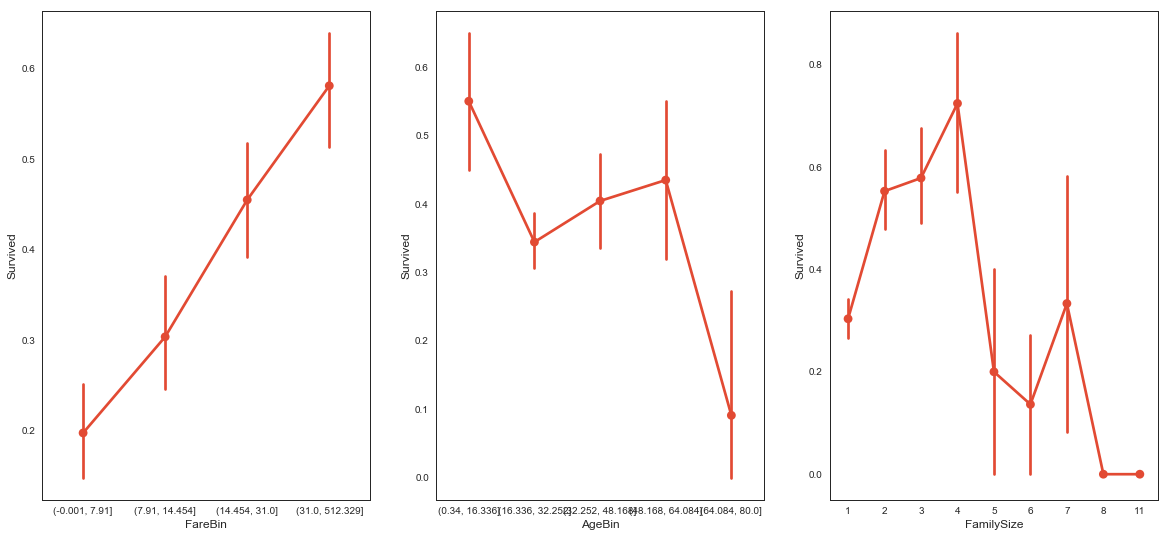

In [244]:
plt.figure(figsize=(20,9))
plt.subplot(131)    
sns.pointplot(x = 'FareBin', y = 'Survived', data=df)
plt.subplot(132)    
sns.pointplot(x = 'AgeBin', y = 'Survived', data=df)
plt.subplot(133)    
sns.pointplot(x = 'FamilySize', y = 'Survived', data=df)

In [245]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,FareBin_Code,AgeBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.336, 32.252]",1,2,3,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.252, 48.168]",0,0,4,3,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.336, 32.252]",0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.252, 48.168]",0,2,4,3,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.252, 48.168]",1,2,3,1,2
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,1,1,Mr,"(7.91, 14.454]","(16.336, 32.252]",1,1,3,1,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1,1,Mr,"(31.0, 512.329]","(48.168, 64.084]",1,2,3,3,3
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,5,0,Master,"(14.454, 31.0]","(0.34, 16.336]",1,2,0,2,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3,0,Mrs,"(7.91, 14.454]","(16.336, 32.252]",0,2,4,1,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,2,0,Mrs,"(14.454, 31.0]","(0.34, 16.336]",0,0,4,2,0


In [246]:
colormap = sns.diverging_palette(220, 10, as_cmap = True)

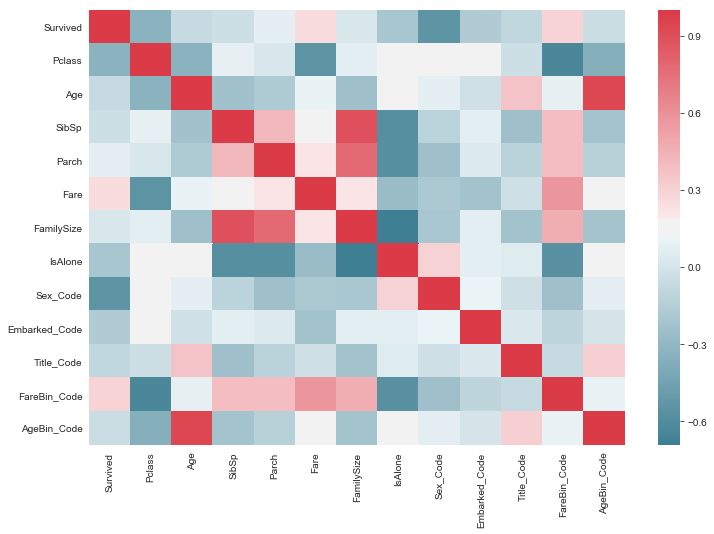

In [247]:
sns.heatmap(df.corr(),cmap=colormap)

In [248]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

In [308]:
#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit

#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = df[Target]

In [309]:
for i,algorithm in enumerate(MLA):
    #set name and parameters
    MLA_name = algorithm.__class__.__name__
    MLA_compare.loc[i,'MLA Name'] = MLA_name
    MLA_compare.loc[i,'MLA Parameters'] = str(algorithm.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(algorithm, df[df_x_bin], df[Target], cv  = cv_split)
    
    MLA_compare.loc[i, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[i, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[i, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[i, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    
    #save MLA predictions - see section 6 for usage
    algorithm.fit(df[df_x_bin], df[Target])
    MLA_predict[MLA_name] = algorithm.predict(df[df_x_bin])

In [313]:
MLA_compare.sort_values('MLA Test Accuracy Mean',ascending=False, inplace=True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.855618,0.827985,0.0530861,0.0302168
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.837266,0.826119,0.0453876,0.0252256
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.895131,0.825373,0.0642658,0.00768211
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.823134,0.0448321,0.00199606
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.866105,0.822761,0.0442837,0.0438704
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.835393,0.822761,0.0493681,0.0292051
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.890637,0.816045,0.0716855,0.00907791
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.851873,0.815672,0.0672015,0.00219421
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.890824,0.813433,0.0754248,0.00918491
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.820599,0.81194,0.0498606,0.0374002


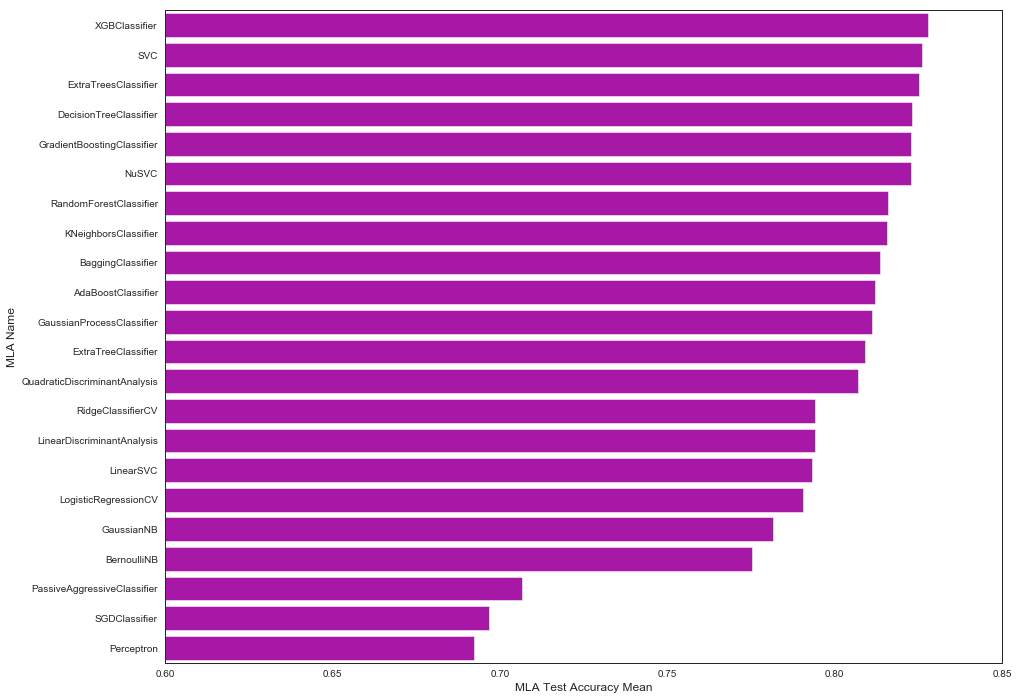

In [326]:
plt.figure(figsize=(15,12))
plt.xlim([0.6,0.85])
sns.barplot(x='MLA Test Accuracy Mean',y='MLA Name',data=MLA_compare,color='m')